## 딥러닝

In [32]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
print(tf.__version__)
print(keras.__version__)

2.3.0
2.4.0


1. 입력과 출력 훈련 데이터 정의
2. 모델 정의
3. 학습 과정 설정(loss, optimizer, metrics)
4. 훈련 fit
5. 평가 evaluate

In [4]:
model= Sequential()

#30개 노드, 17개 입력 특성
model.add(Dense(30, input_dim=17, activation='relu'))

# 출력층, 노드 1, 시그모이드
model.add(Dense(1, activation='sigmoid'))

model.compile(loss  = 'mean_squared_error', optimizer='adam',
             metrics=['accuracy'])



### 오차함수
- MSE = 수렴하기까지 속도가 많이 걸림
- mean_absolute_error ....

-  교차 엔트로피 = 오차가 커지면 수렴 속도 증가, 작아지면 감소
-  이진분류는 binary_crossentropy
-  다중분류는 categorical_crossentropy

### 최적화

- 각 층의 가중치 조정
- adam, SGD, Momentum, NAG, Adagrad, RMSProp ....

### 모델 실행

- model.fit()
- epoch = 학습 프로세스가 모든 샘플에 대해 한 번 실행
- batch_size = 샘플을 한 번에 몇 개씩 처리할지


- validation_split / validation_data / class_weight

In [5]:
lists = os.listdir('./')
lists

['.ipynb_checkpoints', 'DeepLearning.ipynb', 'ThoraricSurgery.csv']

In [6]:
datas = np.loadtxt('./ThoraricSurgery.csv', delimiter=',')

# 폐암 데이터

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from keras.models import load_model

In [39]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

In [9]:
datas

array([[293.  ,   1.  ,   3.8 , ...,   0.  ,  62.  ,   0.  ],
       [  1.  ,   2.  ,   2.88, ...,   0.  ,  60.  ,   0.  ],
       [  8.  ,   2.  ,   3.19, ...,   0.  ,  66.  ,   1.  ],
       ...,
       [406.  ,   6.  ,   5.36, ...,   0.  ,  62.  ,   0.  ],
       [ 25.  ,   8.  ,   4.32, ...,   0.  ,  58.  ,   1.  ],
       [447.  ,   8.  ,   5.2 , ...,   0.  ,  49.  ,   0.  ]])

In [21]:
datas.shape

(470, 18)

In [40]:
X = datas[:,0:17]
y = datas[:,17]
# 17개의 특성까지

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3,
                                                   random_state=seed)

In [61]:
model = Sequential()

#입력층
model.add(Dense(30, input_dim=17, activation='relu'))
#출력층
model.add(Dense(1, activation='sigmoid'))
#환경설정
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
#훈련
model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=2)

# 0 = silent , 1 = progress bar, 2 = one line per epoch


Epoch 1/100
33/33 - 0s - loss: 0.8263 - accuracy: 0.1611
Epoch 2/100
33/33 - 0s - loss: 0.2384 - accuracy: 0.7356
Epoch 3/100
33/33 - 0s - loss: 0.1638 - accuracy: 0.8359
Epoch 4/100
33/33 - 0s - loss: 0.1637 - accuracy: 0.8359
Epoch 5/100
33/33 - 0s - loss: 0.1634 - accuracy: 0.8359
Epoch 6/100
33/33 - 0s - loss: 0.1624 - accuracy: 0.8359
Epoch 7/100
33/33 - 0s - loss: 0.1618 - accuracy: 0.8328
Epoch 8/100
33/33 - 0s - loss: 0.1620 - accuracy: 0.8237
Epoch 9/100
33/33 - 0s - loss: 0.1608 - accuracy: 0.8359
Epoch 10/100
33/33 - 0s - loss: 0.1609 - accuracy: 0.8328
Epoch 11/100
33/33 - 0s - loss: 0.1598 - accuracy: 0.8328
Epoch 12/100
33/33 - 0s - loss: 0.1591 - accuracy: 0.8328
Epoch 13/100
33/33 - 0s - loss: 0.1596 - accuracy: 0.8359
Epoch 14/100
33/33 - 0s - loss: 0.1594 - accuracy: 0.8328
Epoch 15/100
33/33 - 0s - loss: 0.1595 - accuracy: 0.8359
Epoch 16/100
33/33 - 0s - loss: 0.1596 - accuracy: 0.8359
Epoch 17/100
33/33 - 0s - loss: 0.1593 - accuracy: 0.8389
Epoch 18/100
33/33 - 0s

In [42]:
print("Accuracy : ", model.evaluate(X_test, y_test)[1])
print("Loss : {:.3f}".format(model.evaluate(X, y)[0]))

# 1 = accuracy, 0 = loss

5/5 [==============================] - 0s 2ms/step - loss: 0.1107 - accuracy: 0.8865
Accuracy :  0.8865247964859009
15/15 [==============================] - 0s 1ms/step - loss: 0.1406 - accuracy: 0.8532
Loss : 0.141


In [43]:
model.summary()

# 17*30+30 = 540
# 특성별 노드 30개 + 편향 30

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 30)                540       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 31        
Total params: 571
Trainable params: 571
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.save('my_model.h5')
# h5 = Hierarchical Data Format, HDF5

del model # 기존 메모리의 모델 삭제

In [45]:
model = load_model('my_model.h5')

In [46]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 30)                540       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 31        
Total params: 571
Trainable params: 571
Non-trainable params: 0
_________________________________________________________________


#### epoch마다 모델의 정확도 기록

In [47]:
from keras.callbacks import ModelCheckpoint

MODEL_DIR = './model'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
# 모델 폴더가 없으면 새로 만들기

modelpath = './model/{epoch:02d}-{val_loss:4f}.hdf5'
# 에포크 횟수와 테스트 오차 값으로 파일명을 만들어 모델을 저장
# 모델을 저장하기 위해서 콜백함수를 호출함

- 학습 세트 오차 : loss
- 테스트 세트 오차 : val_loss
- 학습 정확도 : acc
- 테스트셋 정확도 : val_acc

In [62]:
checkpointer = ModelCheckpoint(filepath = modelpath, monitor='val_loss', verbose=1)

model.fit(X, y, validation_split=0.2, epochs=100, batch_size=100, verbose=2,
         callbacks=[checkpointer])


Epoch 1/100

Epoch 00001: saving model to ./model\01-0.147117.hdf5
4/4 - 0s - loss: 0.1360 - accuracy: 0.8617 - val_loss: 0.1471 - val_accuracy: 0.8404
Epoch 2/100

Epoch 00002: saving model to ./model\02-0.147716.hdf5
4/4 - 0s - loss: 0.1360 - accuracy: 0.8644 - val_loss: 0.1477 - val_accuracy: 0.8404
Epoch 3/100

Epoch 00003: saving model to ./model\03-0.148576.hdf5
4/4 - 0s - loss: 0.1355 - accuracy: 0.8617 - val_loss: 0.1486 - val_accuracy: 0.8404
Epoch 4/100

Epoch 00004: saving model to ./model\04-0.149251.hdf5
4/4 - 0s - loss: 0.1352 - accuracy: 0.8590 - val_loss: 0.1493 - val_accuracy: 0.8404
Epoch 5/100

Epoch 00005: saving model to ./model\05-0.149511.hdf5
4/4 - 0s - loss: 0.1350 - accuracy: 0.8590 - val_loss: 0.1495 - val_accuracy: 0.8404
Epoch 6/100

Epoch 00006: saving model to ./model\06-0.149311.hdf5
4/4 - 0s - loss: 0.1350 - accuracy: 0.8590 - val_loss: 0.1493 - val_accuracy: 0.8404
Epoch 7/100

Epoch 00007: saving model to ./model\07-0.148500.hdf5
4/4 - 0s - loss: 0.13

Epoch 55/100

Epoch 00055: saving model to ./model\55-0.142164.hdf5
4/4 - 0s - loss: 0.1327 - accuracy: 0.8617 - val_loss: 0.1422 - val_accuracy: 0.8298
Epoch 56/100

Epoch 00056: saving model to ./model\56-0.141030.hdf5
4/4 - 0s - loss: 0.1327 - accuracy: 0.8617 - val_loss: 0.1410 - val_accuracy: 0.8298
Epoch 57/100

Epoch 00057: saving model to ./model\57-0.140494.hdf5
4/4 - 0s - loss: 0.1327 - accuracy: 0.8617 - val_loss: 0.1405 - val_accuracy: 0.8298
Epoch 58/100

Epoch 00058: saving model to ./model\58-0.142484.hdf5
4/4 - 0s - loss: 0.1329 - accuracy: 0.8617 - val_loss: 0.1425 - val_accuracy: 0.8298
Epoch 59/100

Epoch 00059: saving model to ./model\59-0.142255.hdf5
4/4 - 0s - loss: 0.1325 - accuracy: 0.8617 - val_loss: 0.1423 - val_accuracy: 0.8298
Epoch 60/100

Epoch 00060: saving model to ./model\60-0.141753.hdf5
4/4 - 0s - loss: 0.1325 - accuracy: 0.8617 - val_loss: 0.1418 - val_accuracy: 0.8298
Epoch 61/100

Epoch 00061: saving model to ./model\61-0.141288.hdf5
4/4 - 0s - los

In [49]:
checkpointer = ModelCheckpoint(filepath = modelpath, 
                               monitor='val_loss', verbose=1,
                              save_best_only=True)

# save_best_only = 개선된 결과만 저장

model.fit(X, y, validation_split=0.2, epochs=100, batch_size=100, verbose=0,
         callbacks=[checkpointer])



Epoch 00001: val_loss improved from inf to 0.15327, saving model to ./model\01-0.153267.hdf5

Epoch 00002: val_loss did not improve from 0.15327

Epoch 00003: val_loss did not improve from 0.15327

Epoch 00004: val_loss did not improve from 0.15327

Epoch 00005: val_loss improved from 0.15327 to 0.15035, saving model to ./model\05-0.150348.hdf5

Epoch 00006: val_loss improved from 0.15035 to 0.15000, saving model to ./model\06-0.149996.hdf5

Epoch 00007: val_loss did not improve from 0.15000

Epoch 00008: val_loss did not improve from 0.15000

Epoch 00009: val_loss did not improve from 0.15000

Epoch 00010: val_loss did not improve from 0.15000

Epoch 00011: val_loss did not improve from 0.15000

Epoch 00012: val_loss did not improve from 0.15000

Epoch 00013: val_loss did not improve from 0.15000

Epoch 00014: val_loss did not improve from 0.15000

Epoch 00015: val_loss did not improve from 0.15000

Epoch 00016: val_loss did not improve from 0.15000

Epoch 00017: val_loss did not imp

In [63]:
history = model.fit(X_train, y_train, validation_split=.2,
                   epochs=3000, batch_size=500)

Epoch 1/3000
1/1 [==============================] - 0s 92ms/step - loss: 0.1487 - accuracy: 0.8441 - val_loss: 0.1187 - val_accuracy: 0.8485
Epoch 2/3000
1/1 [==============================] - 0s 29ms/step - loss: 0.1487 - accuracy: 0.8441 - val_loss: 0.1184 - val_accuracy: 0.8485
Epoch 3/3000
1/1 [==============================] - 0s 27ms/step - loss: 0.1486 - accuracy: 0.8441 - val_loss: 0.1179 - val_accuracy: 0.8485
Epoch 4/3000
1/1 [==============================] - 0s 44ms/step - loss: 0.1485 - accuracy: 0.8441 - val_loss: 0.1173 - val_accuracy: 0.8485
Epoch 5/3000
1/1 [==============================] - 0s 51ms/step - loss: 0.1484 - accuracy: 0.8441 - val_loss: 0.1166 - val_accuracy: 0.8485
Epoch 6/3000
1/1 [==============================] - 0s 49ms/step - loss: 0.1482 - accuracy: 0.8441 - val_loss: 0.1160 - val_accuracy: 0.8485
Epoch 7/3000
1/1 [==============================] - 0s 59ms/step - loss: 0.1481 - accuracy: 0.8441 - val_loss: 0.1154 - val_accuracy: 0.8485
Epoch 8/3000


Epoch 59/3000
1/1 [==============================] - 0s 44ms/step - loss: 0.1460 - accuracy: 0.8479 - val_loss: 0.1198 - val_accuracy: 0.8636
Epoch 60/3000
1/1 [==============================] - 0s 25ms/step - loss: 0.1460 - accuracy: 0.8479 - val_loss: 0.1198 - val_accuracy: 0.8636
Epoch 61/3000
1/1 [==============================] - 0s 40ms/step - loss: 0.1460 - accuracy: 0.8479 - val_loss: 0.1198 - val_accuracy: 0.8636
Epoch 62/3000
1/1 [==============================] - 0s 39ms/step - loss: 0.1460 - accuracy: 0.8479 - val_loss: 0.1198 - val_accuracy: 0.8636
Epoch 63/3000
1/1 [==============================] - 0s 54ms/step - loss: 0.1459 - accuracy: 0.8479 - val_loss: 0.1198 - val_accuracy: 0.8636
Epoch 64/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.1459 - accuracy: 0.8479 - val_loss: 0.1198 - val_accuracy: 0.8636
Epoch 65/3000
1/1 [==============================] - 0s 48ms/step - loss: 0.1459 - accuracy: 0.8479 - val_loss: 0.1197 - val_accuracy: 0.8636
Epoch 

1/1 [==============================] - 0s 41ms/step - loss: 0.1277 - accuracy: 0.8517 - val_loss: 0.1117 - val_accuracy: 0.8485
Epoch 117/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.1271 - accuracy: 0.8555 - val_loss: 0.1115 - val_accuracy: 0.8485
Epoch 118/3000
1/1 [==============================] - 0s 53ms/step - loss: 0.1268 - accuracy: 0.8479 - val_loss: 0.1137 - val_accuracy: 0.8485
Epoch 119/3000
1/1 [==============================] - 0s 35ms/step - loss: 0.1265 - accuracy: 0.8555 - val_loss: 0.1134 - val_accuracy: 0.8485
Epoch 120/3000
1/1 [==============================] - 0s 35ms/step - loss: 0.1261 - accuracy: 0.8517 - val_loss: 0.1130 - val_accuracy: 0.8485
Epoch 121/3000
1/1 [==============================] - 0s 32ms/step - loss: 0.1260 - accuracy: 0.8517 - val_loss: 0.1147 - val_accuracy: 0.8485
Epoch 122/3000
1/1 [==============================] - 0s 36ms/step - loss: 0.1257 - accuracy: 0.8517 - val_loss: 0.1151 - val_accuracy: 0.8485
Epoch 123/3000

1/1 [==============================] - 0s 29ms/step - loss: 0.1378 - accuracy: 0.8479 - val_loss: 0.1262 - val_accuracy: 0.8485
Epoch 174/3000
1/1 [==============================] - 0s 63ms/step - loss: 0.1359 - accuracy: 0.8441 - val_loss: 0.1230 - val_accuracy: 0.8485
Epoch 175/3000
1/1 [==============================] - 0s 29ms/step - loss: 0.1307 - accuracy: 0.8479 - val_loss: 0.1201 - val_accuracy: 0.8485
Epoch 176/3000
1/1 [==============================] - 0s 70ms/step - loss: 0.1195 - accuracy: 0.8441 - val_loss: 0.1561 - val_accuracy: 0.7727
Epoch 177/3000
1/1 [==============================] - 0s 35ms/step - loss: 0.1305 - accuracy: 0.8327 - val_loss: 0.1269 - val_accuracy: 0.8333
Epoch 178/3000
1/1 [==============================] - 0s 35ms/step - loss: 0.1157 - accuracy: 0.8517 - val_loss: 0.1210 - val_accuracy: 0.8485
Epoch 179/3000
1/1 [==============================] - 0s 38ms/step - loss: 0.1204 - accuracy: 0.8441 - val_loss: 0.1214 - val_accuracy: 0.8485
Epoch 180/3000

1/1 [==============================] - 0s 49ms/step - loss: 0.1127 - accuracy: 0.8555 - val_loss: 0.1231 - val_accuracy: 0.8485
Epoch 231/3000
1/1 [==============================] - 0s 44ms/step - loss: 0.1127 - accuracy: 0.8593 - val_loss: 0.1234 - val_accuracy: 0.8485
Epoch 232/3000
1/1 [==============================] - 0s 78ms/step - loss: 0.1127 - accuracy: 0.8593 - val_loss: 0.1227 - val_accuracy: 0.8485
Epoch 233/3000
1/1 [==============================] - 0s 74ms/step - loss: 0.1126 - accuracy: 0.8593 - val_loss: 0.1223 - val_accuracy: 0.8485
Epoch 234/3000
1/1 [==============================] - 0s 38ms/step - loss: 0.1126 - accuracy: 0.8555 - val_loss: 0.1228 - val_accuracy: 0.8485
Epoch 235/3000
1/1 [==============================] - 0s 36ms/step - loss: 0.1126 - accuracy: 0.8593 - val_loss: 0.1234 - val_accuracy: 0.8485
Epoch 236/3000
1/1 [==============================] - 0s 32ms/step - loss: 0.1125 - accuracy: 0.8593 - val_loss: 0.1233 - val_accuracy: 0.8485
Epoch 237/3000

1/1 [==============================] - 0s 33ms/step - loss: 0.1113 - accuracy: 0.8669 - val_loss: 0.1247 - val_accuracy: 0.8485
Epoch 288/3000
1/1 [==============================] - 0s 34ms/step - loss: 0.1113 - accuracy: 0.8669 - val_loss: 0.1248 - val_accuracy: 0.8485
Epoch 289/3000
1/1 [==============================] - 0s 32ms/step - loss: 0.1113 - accuracy: 0.8669 - val_loss: 0.1248 - val_accuracy: 0.8485
Epoch 290/3000
1/1 [==============================] - 0s 30ms/step - loss: 0.1112 - accuracy: 0.8669 - val_loss: 0.1247 - val_accuracy: 0.8485
Epoch 291/3000
1/1 [==============================] - 0s 20ms/step - loss: 0.1112 - accuracy: 0.8669 - val_loss: 0.1248 - val_accuracy: 0.8485
Epoch 292/3000
1/1 [==============================] - 0s 38ms/step - loss: 0.1112 - accuracy: 0.8669 - val_loss: 0.1248 - val_accuracy: 0.8485
Epoch 293/3000
1/1 [==============================] - 0s 29ms/step - loss: 0.1112 - accuracy: 0.8669 - val_loss: 0.1249 - val_accuracy: 0.8485
Epoch 294/3000

Epoch 344/3000
1/1 [==============================] - 0s 52ms/step - loss: 0.1104 - accuracy: 0.8745 - val_loss: 0.1253 - val_accuracy: 0.8333
Epoch 345/3000
1/1 [==============================] - 0s 38ms/step - loss: 0.1104 - accuracy: 0.8745 - val_loss: 0.1253 - val_accuracy: 0.8333
Epoch 346/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.1104 - accuracy: 0.8745 - val_loss: 0.1254 - val_accuracy: 0.8333
Epoch 347/3000
1/1 [==============================] - 0s 30ms/step - loss: 0.1104 - accuracy: 0.8745 - val_loss: 0.1254 - val_accuracy: 0.8333
Epoch 348/3000
1/1 [==============================] - 0s 34ms/step - loss: 0.1104 - accuracy: 0.8745 - val_loss: 0.1254 - val_accuracy: 0.8333
Epoch 349/3000
1/1 [==============================] - 0s 36ms/step - loss: 0.1103 - accuracy: 0.8745 - val_loss: 0.1254 - val_accuracy: 0.8333
Epoch 350/3000
1/1 [==============================] - 0s 38ms/step - loss: 0.1103 - accuracy: 0.8745 - val_loss: 0.1254 - val_accuracy: 0.8333

Epoch 401/3000
1/1 [==============================] - 0s 28ms/step - loss: 0.1097 - accuracy: 0.8745 - val_loss: 0.1260 - val_accuracy: 0.8333
Epoch 402/3000
1/1 [==============================] - 0s 30ms/step - loss: 0.1097 - accuracy: 0.8745 - val_loss: 0.1260 - val_accuracy: 0.8333
Epoch 403/3000
1/1 [==============================] - 0s 26ms/step - loss: 0.1097 - accuracy: 0.8745 - val_loss: 0.1260 - val_accuracy: 0.8333
Epoch 404/3000
1/1 [==============================] - 0s 27ms/step - loss: 0.1097 - accuracy: 0.8745 - val_loss: 0.1261 - val_accuracy: 0.8333
Epoch 405/3000
1/1 [==============================] - 0s 34ms/step - loss: 0.1097 - accuracy: 0.8783 - val_loss: 0.1261 - val_accuracy: 0.8333
Epoch 406/3000
1/1 [==============================] - 0s 22ms/step - loss: 0.1097 - accuracy: 0.8783 - val_loss: 0.1260 - val_accuracy: 0.8333
Epoch 407/3000
1/1 [==============================] - 0s 27ms/step - loss: 0.1096 - accuracy: 0.8783 - val_loss: 0.1261 - val_accuracy: 0.8333

1/1 [==============================] - 0s 29ms/step - loss: 0.1091 - accuracy: 0.8783 - val_loss: 0.1267 - val_accuracy: 0.8333
Epoch 459/3000
1/1 [==============================] - 0s 27ms/step - loss: 0.1091 - accuracy: 0.8783 - val_loss: 0.1266 - val_accuracy: 0.8333
Epoch 460/3000
1/1 [==============================] - 0s 30ms/step - loss: 0.1091 - accuracy: 0.8783 - val_loss: 0.1266 - val_accuracy: 0.8333
Epoch 461/3000
1/1 [==============================] - 0s 26ms/step - loss: 0.1091 - accuracy: 0.8783 - val_loss: 0.1267 - val_accuracy: 0.8333
Epoch 462/3000
1/1 [==============================] - 0s 45ms/step - loss: 0.1091 - accuracy: 0.8783 - val_loss: 0.1267 - val_accuracy: 0.8333
Epoch 463/3000
1/1 [==============================] - 0s 70ms/step - loss: 0.1091 - accuracy: 0.8783 - val_loss: 0.1267 - val_accuracy: 0.8333
Epoch 464/3000
1/1 [==============================] - 0s 71ms/step - loss: 0.1090 - accuracy: 0.8783 - val_loss: 0.1266 - val_accuracy: 0.8333
Epoch 465/3000

1/1 [==============================] - 0s 50ms/step - loss: 0.1085 - accuracy: 0.8783 - val_loss: 0.1272 - val_accuracy: 0.8333
Epoch 516/3000
1/1 [==============================] - 0s 31ms/step - loss: 0.1085 - accuracy: 0.8783 - val_loss: 0.1272 - val_accuracy: 0.8333
Epoch 517/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.1085 - accuracy: 0.8783 - val_loss: 0.1271 - val_accuracy: 0.8333
Epoch 518/3000
1/1 [==============================] - 0s 93ms/step - loss: 0.1085 - accuracy: 0.8783 - val_loss: 0.1271 - val_accuracy: 0.8333
Epoch 519/3000
1/1 [==============================] - 0s 148ms/step - loss: 0.1085 - accuracy: 0.8783 - val_loss: 0.1272 - val_accuracy: 0.8333
Epoch 520/3000
1/1 [==============================] - 0s 72ms/step - loss: 0.1085 - accuracy: 0.8783 - val_loss: 0.1272 - val_accuracy: 0.8333
Epoch 521/3000
1/1 [==============================] - 0s 57ms/step - loss: 0.1085 - accuracy: 0.8783 - val_loss: 0.1272 - val_accuracy: 0.8333
Epoch 522/300

1/1 [==============================] - 0s 120ms/step - loss: 0.1080 - accuracy: 0.8783 - val_loss: 0.1270 - val_accuracy: 0.8333
Epoch 573/3000
1/1 [==============================] - 0s 45ms/step - loss: 0.1080 - accuracy: 0.8783 - val_loss: 0.1270 - val_accuracy: 0.8333
Epoch 574/3000
1/1 [==============================] - 0s 56ms/step - loss: 0.1079 - accuracy: 0.8783 - val_loss: 0.1270 - val_accuracy: 0.8333
Epoch 575/3000
1/1 [==============================] - 0s 96ms/step - loss: 0.1079 - accuracy: 0.8783 - val_loss: 0.1269 - val_accuracy: 0.8333
Epoch 576/3000
1/1 [==============================] - 0s 68ms/step - loss: 0.1079 - accuracy: 0.8783 - val_loss: 0.1269 - val_accuracy: 0.8333
Epoch 577/3000
1/1 [==============================] - 0s 115ms/step - loss: 0.1079 - accuracy: 0.8783 - val_loss: 0.1270 - val_accuracy: 0.8333
Epoch 578/3000
1/1 [==============================] - 0s 82ms/step - loss: 0.1079 - accuracy: 0.8783 - val_loss: 0.1270 - val_accuracy: 0.8333
Epoch 579/30

1/1 [==============================] - 0s 94ms/step - loss: 0.1075 - accuracy: 0.8783 - val_loss: 0.1278 - val_accuracy: 0.8333
Epoch 630/3000
1/1 [==============================] - 0s 80ms/step - loss: 0.1075 - accuracy: 0.8783 - val_loss: 0.1278 - val_accuracy: 0.8333
Epoch 631/3000
1/1 [==============================] - 0s 67ms/step - loss: 0.1074 - accuracy: 0.8783 - val_loss: 0.1278 - val_accuracy: 0.8333
Epoch 632/3000
1/1 [==============================] - 0s 72ms/step - loss: 0.1074 - accuracy: 0.8783 - val_loss: 0.1278 - val_accuracy: 0.8333
Epoch 633/3000
1/1 [==============================] - 0s 74ms/step - loss: 0.1074 - accuracy: 0.8783 - val_loss: 0.1279 - val_accuracy: 0.8333
Epoch 634/3000
1/1 [==============================] - 0s 33ms/step - loss: 0.1074 - accuracy: 0.8783 - val_loss: 0.1279 - val_accuracy: 0.8333
Epoch 635/3000
1/1 [==============================] - 0s 44ms/step - loss: 0.1074 - accuracy: 0.8783 - val_loss: 0.1278 - val_accuracy: 0.8333
Epoch 636/3000

Epoch 686/3000
1/1 [==============================] - 0s 35ms/step - loss: 0.1070 - accuracy: 0.8783 - val_loss: 0.1283 - val_accuracy: 0.8333
Epoch 687/3000
1/1 [==============================] - 0s 30ms/step - loss: 0.1070 - accuracy: 0.8783 - val_loss: 0.1285 - val_accuracy: 0.8333
Epoch 688/3000
1/1 [==============================] - 0s 25ms/step - loss: 0.1070 - accuracy: 0.8783 - val_loss: 0.1286 - val_accuracy: 0.8333
Epoch 689/3000
1/1 [==============================] - 0s 28ms/step - loss: 0.1070 - accuracy: 0.8783 - val_loss: 0.1285 - val_accuracy: 0.8333
Epoch 690/3000
1/1 [==============================] - 0s 26ms/step - loss: 0.1070 - accuracy: 0.8783 - val_loss: 0.1284 - val_accuracy: 0.8333
Epoch 691/3000
1/1 [==============================] - 0s 25ms/step - loss: 0.1070 - accuracy: 0.8783 - val_loss: 0.1285 - val_accuracy: 0.8333
Epoch 692/3000
1/1 [==============================] - 0s 28ms/step - loss: 0.1069 - accuracy: 0.8783 - val_loss: 0.1286 - val_accuracy: 0.8333

Epoch 743/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.1066 - accuracy: 0.8783 - val_loss: 0.1291 - val_accuracy: 0.8333
Epoch 744/3000
1/1 [==============================] - 0s 29ms/step - loss: 0.1065 - accuracy: 0.8783 - val_loss: 0.1290 - val_accuracy: 0.8333
Epoch 745/3000
1/1 [==============================] - 0s 32ms/step - loss: 0.1065 - accuracy: 0.8783 - val_loss: 0.1290 - val_accuracy: 0.8333
Epoch 746/3000
1/1 [==============================] - 0s 26ms/step - loss: 0.1065 - accuracy: 0.8783 - val_loss: 0.1291 - val_accuracy: 0.8333
Epoch 747/3000
1/1 [==============================] - ETA: 0s - loss: 0.1065 - accuracy: 0.87 - 0s 27ms/step - loss: 0.1065 - accuracy: 0.8783 - val_loss: 0.1292 - val_accuracy: 0.8333
Epoch 748/3000
1/1 [==============================] - 0s 34ms/step - loss: 0.1065 - accuracy: 0.8783 - val_loss: 0.1290 - val_accuracy: 0.8333
Epoch 749/3000
1/1 [==============================] - 0s 29ms/step - loss: 0.1065 - accuracy: 0.8783

Epoch 800/3000
1/1 [==============================] - 0s 30ms/step - loss: 0.1061 - accuracy: 0.8783 - val_loss: 0.1296 - val_accuracy: 0.8333
Epoch 801/3000
1/1 [==============================] - 0s 29ms/step - loss: 0.1061 - accuracy: 0.8783 - val_loss: 0.1297 - val_accuracy: 0.8333
Epoch 802/3000
1/1 [==============================] - 0s 22ms/step - loss: 0.1061 - accuracy: 0.8783 - val_loss: 0.1297 - val_accuracy: 0.8333
Epoch 803/3000
1/1 [==============================] - 0s 38ms/step - loss: 0.1061 - accuracy: 0.8783 - val_loss: 0.1296 - val_accuracy: 0.8333
Epoch 804/3000
1/1 [==============================] - 0s 24ms/step - loss: 0.1061 - accuracy: 0.8783 - val_loss: 0.1296 - val_accuracy: 0.8333
Epoch 805/3000
1/1 [==============================] - 0s 24ms/step - loss: 0.1061 - accuracy: 0.8783 - val_loss: 0.1297 - val_accuracy: 0.8333
Epoch 806/3000
1/1 [==============================] - 0s 27ms/step - loss: 0.1061 - accuracy: 0.8783 - val_loss: 0.1298 - val_accuracy: 0.8333

1/1 [==============================] - 0s 21ms/step - loss: 0.1057 - accuracy: 0.8783 - val_loss: 0.1302 - val_accuracy: 0.8333
Epoch 858/3000
1/1 [==============================] - 0s 26ms/step - loss: 0.1057 - accuracy: 0.8783 - val_loss: 0.1301 - val_accuracy: 0.8333
Epoch 859/3000
1/1 [==============================] - 0s 34ms/step - loss: 0.1057 - accuracy: 0.8783 - val_loss: 0.1301 - val_accuracy: 0.8333
Epoch 860/3000
1/1 [==============================] - 0s 22ms/step - loss: 0.1057 - accuracy: 0.8783 - val_loss: 0.1302 - val_accuracy: 0.8333
Epoch 861/3000
1/1 [==============================] - 0s 24ms/step - loss: 0.1057 - accuracy: 0.8783 - val_loss: 0.1303 - val_accuracy: 0.8333
Epoch 862/3000
1/1 [==============================] - 0s 23ms/step - loss: 0.1057 - accuracy: 0.8783 - val_loss: 0.1302 - val_accuracy: 0.8333
Epoch 863/3000
1/1 [==============================] - 0s 25ms/step - loss: 0.1057 - accuracy: 0.8783 - val_loss: 0.1302 - val_accuracy: 0.8333
Epoch 864/3000

1/1 [==============================] - 0s 30ms/step - loss: 0.1053 - accuracy: 0.8783 - val_loss: 0.1308 - val_accuracy: 0.8333
Epoch 915/3000
1/1 [==============================] - 0s 29ms/step - loss: 0.1053 - accuracy: 0.8783 - val_loss: 0.1308 - val_accuracy: 0.8333
Epoch 916/3000
1/1 [==============================] - 0s 24ms/step - loss: 0.1053 - accuracy: 0.8783 - val_loss: 0.1307 - val_accuracy: 0.8333
Epoch 917/3000
1/1 [==============================] - 0s 36ms/step - loss: 0.1053 - accuracy: 0.8783 - val_loss: 0.1308 - val_accuracy: 0.8333
Epoch 918/3000
1/1 [==============================] - 0s 36ms/step - loss: 0.1053 - accuracy: 0.8783 - val_loss: 0.1309 - val_accuracy: 0.8333
Epoch 919/3000
1/1 [==============================] - 0s 38ms/step - loss: 0.1053 - accuracy: 0.8783 - val_loss: 0.1307 - val_accuracy: 0.8333
Epoch 920/3000
1/1 [==============================] - 0s 30ms/step - loss: 0.1052 - accuracy: 0.8783 - val_loss: 0.1307 - val_accuracy: 0.8333
Epoch 921/3000

1/1 [==============================] - 0s 29ms/step - loss: 0.1049 - accuracy: 0.8783 - val_loss: 0.1312 - val_accuracy: 0.8333
Epoch 972/3000
1/1 [==============================] - 0s 23ms/step - loss: 0.1049 - accuracy: 0.8783 - val_loss: 0.1313 - val_accuracy: 0.8333
Epoch 973/3000
1/1 [==============================] - 0s 31ms/step - loss: 0.1049 - accuracy: 0.8783 - val_loss: 0.1314 - val_accuracy: 0.8333
Epoch 974/3000
1/1 [==============================] - 0s 20ms/step - loss: 0.1049 - accuracy: 0.8783 - val_loss: 0.1312 - val_accuracy: 0.8333
Epoch 975/3000
1/1 [==============================] - 0s 26ms/step - loss: 0.1049 - accuracy: 0.8783 - val_loss: 0.1313 - val_accuracy: 0.8333
Epoch 976/3000
1/1 [==============================] - 0s 27ms/step - loss: 0.1049 - accuracy: 0.8783 - val_loss: 0.1314 - val_accuracy: 0.8333
Epoch 977/3000
1/1 [==============================] - 0s 36ms/step - loss: 0.1049 - accuracy: 0.8783 - val_loss: 0.1313 - val_accuracy: 0.8333
Epoch 978/3000

1/1 [==============================] - 0s 22ms/step - loss: 0.1045 - accuracy: 0.8783 - val_loss: 0.1317 - val_accuracy: 0.8333
Epoch 1028/3000
1/1 [==============================] - 0s 21ms/step - loss: 0.1045 - accuracy: 0.8783 - val_loss: 0.1318 - val_accuracy: 0.8333
Epoch 1029/3000
1/1 [==============================] - 0s 22ms/step - loss: 0.1045 - accuracy: 0.8783 - val_loss: 0.1318 - val_accuracy: 0.8333
Epoch 1030/3000
1/1 [==============================] - 0s 20ms/step - loss: 0.1045 - accuracy: 0.8783 - val_loss: 0.1317 - val_accuracy: 0.8333
Epoch 1031/3000
1/1 [==============================] - 0s 21ms/step - loss: 0.1045 - accuracy: 0.8783 - val_loss: 0.1318 - val_accuracy: 0.8333
Epoch 1032/3000
1/1 [==============================] - 0s 24ms/step - loss: 0.1045 - accuracy: 0.8783 - val_loss: 0.1318 - val_accuracy: 0.8333
Epoch 1033/3000
1/1 [==============================] - 0s 28ms/step - loss: 0.1045 - accuracy: 0.8783 - val_loss: 0.1318 - val_accuracy: 0.8333
Epoch 10

1/1 [==============================] - 0s 25ms/step - loss: 0.1042 - accuracy: 0.8821 - val_loss: 0.1323 - val_accuracy: 0.8333
Epoch 1084/3000
1/1 [==============================] - 0s 28ms/step - loss: 0.1041 - accuracy: 0.8821 - val_loss: 0.1321 - val_accuracy: 0.8333
Epoch 1085/3000
1/1 [==============================] - 0s 41ms/step - loss: 0.1041 - accuracy: 0.8821 - val_loss: 0.1322 - val_accuracy: 0.8333
Epoch 1086/3000
1/1 [==============================] - 0s 49ms/step - loss: 0.1041 - accuracy: 0.8821 - val_loss: 0.1324 - val_accuracy: 0.8333
Epoch 1087/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.1041 - accuracy: 0.8821 - val_loss: 0.1322 - val_accuracy: 0.8333
Epoch 1088/3000
1/1 [==============================] - 0s 34ms/step - loss: 0.1041 - accuracy: 0.8821 - val_loss: 0.1321 - val_accuracy: 0.8333
Epoch 1089/3000
1/1 [==============================] - 0s 28ms/step - loss: 0.1041 - accuracy: 0.8821 - val_loss: 0.1323 - val_accuracy: 0.8333
Epoch 10

Epoch 1140/3000
1/1 [==============================] - 0s 38ms/step - loss: 0.1038 - accuracy: 0.8821 - val_loss: 0.1329 - val_accuracy: 0.8182
Epoch 1141/3000
1/1 [==============================] - 0s 44ms/step - loss: 0.1038 - accuracy: 0.8821 - val_loss: 0.1328 - val_accuracy: 0.8182
Epoch 1142/3000
1/1 [==============================] - 0s 30ms/step - loss: 0.1038 - accuracy: 0.8821 - val_loss: 0.1328 - val_accuracy: 0.8182
Epoch 1143/3000
1/1 [==============================] - 0s 35ms/step - loss: 0.1038 - accuracy: 0.8821 - val_loss: 0.1329 - val_accuracy: 0.8182
Epoch 1144/3000
1/1 [==============================] - 0s 47ms/step - loss: 0.1038 - accuracy: 0.8821 - val_loss: 0.1328 - val_accuracy: 0.8182
Epoch 1145/3000
1/1 [==============================] - 0s 33ms/step - loss: 0.1038 - accuracy: 0.8821 - val_loss: 0.1329 - val_accuracy: 0.8182
Epoch 1146/3000
1/1 [==============================] - 0s 27ms/step - loss: 0.1037 - accuracy: 0.8821 - val_loss: 0.1330 - val_accuracy:

Epoch 1197/3000
1/1 [==============================] - 0s 33ms/step - loss: 0.1034 - accuracy: 0.8821 - val_loss: 0.1334 - val_accuracy: 0.8182
Epoch 1198/3000
1/1 [==============================] - 0s 30ms/step - loss: 0.1034 - accuracy: 0.8821 - val_loss: 0.1334 - val_accuracy: 0.8182
Epoch 1199/3000
1/1 [==============================] - 0s 27ms/step - loss: 0.1034 - accuracy: 0.8821 - val_loss: 0.1334 - val_accuracy: 0.8182
Epoch 1200/3000
1/1 [==============================] - 0s 30ms/step - loss: 0.1034 - accuracy: 0.8821 - val_loss: 0.1335 - val_accuracy: 0.8182
Epoch 1201/3000
1/1 [==============================] - 0s 28ms/step - loss: 0.1034 - accuracy: 0.8821 - val_loss: 0.1335 - val_accuracy: 0.8182
Epoch 1202/3000
1/1 [==============================] - 0s 27ms/step - loss: 0.1034 - accuracy: 0.8821 - val_loss: 0.1334 - val_accuracy: 0.8182
Epoch 1203/3000
1/1 [==============================] - 0s 21ms/step - loss: 0.1034 - accuracy: 0.8821 - val_loss: 0.1334 - val_accuracy:

1/1 [==============================] - 0s 23ms/step - loss: 0.1031 - accuracy: 0.8821 - val_loss: 0.1340 - val_accuracy: 0.8182
Epoch 1254/3000
1/1 [==============================] - 0s 25ms/step - loss: 0.1031 - accuracy: 0.8821 - val_loss: 0.1341 - val_accuracy: 0.8182
Epoch 1255/3000
1/1 [==============================] - 0s 27ms/step - loss: 0.1031 - accuracy: 0.8821 - val_loss: 0.1340 - val_accuracy: 0.8182
Epoch 1256/3000
1/1 [==============================] - 0s 21ms/step - loss: 0.1030 - accuracy: 0.8821 - val_loss: 0.1339 - val_accuracy: 0.8182
Epoch 1257/3000
1/1 [==============================] - 0s 24ms/step - loss: 0.1030 - accuracy: 0.8821 - val_loss: 0.1342 - val_accuracy: 0.8182
Epoch 1258/3000
1/1 [==============================] - 0s 24ms/step - loss: 0.1030 - accuracy: 0.8821 - val_loss: 0.1341 - val_accuracy: 0.8182
Epoch 1259/3000
1/1 [==============================] - 0s 25ms/step - loss: 0.1030 - accuracy: 0.8821 - val_loss: 0.1340 - val_accuracy: 0.8182
Epoch 12

Epoch 1310/3000
1/1 [==============================] - 0s 27ms/step - loss: 0.1027 - accuracy: 0.8821 - val_loss: 0.1349 - val_accuracy: 0.8182
Epoch 1311/3000
1/1 [==============================] - 0s 53ms/step - loss: 0.1027 - accuracy: 0.8821 - val_loss: 0.1347 - val_accuracy: 0.8182
Epoch 1312/3000
1/1 [==============================] - 0s 151ms/step - loss: 0.1027 - accuracy: 0.8821 - val_loss: 0.1349 - val_accuracy: 0.8182
Epoch 1313/3000
1/1 [==============================] - 0s 57ms/step - loss: 0.1027 - accuracy: 0.8821 - val_loss: 0.1349 - val_accuracy: 0.8182
Epoch 1314/3000
1/1 [==============================] - 0s 51ms/step - loss: 0.1027 - accuracy: 0.8821 - val_loss: 0.1348 - val_accuracy: 0.8182
Epoch 1315/3000
1/1 [==============================] - 0s 55ms/step - loss: 0.1027 - accuracy: 0.8821 - val_loss: 0.1348 - val_accuracy: 0.8182
Epoch 1316/3000
1/1 [==============================] - 0s 63ms/step - loss: 0.1026 - accuracy: 0.8821 - val_loss: 0.1350 - val_accuracy

1/1 [==============================] - 0s 21ms/step - loss: 0.1023 - accuracy: 0.8821 - val_loss: 0.1353 - val_accuracy: 0.8182
Epoch 1367/3000
1/1 [==============================] - 0s 22ms/step - loss: 0.1023 - accuracy: 0.8821 - val_loss: 0.1353 - val_accuracy: 0.8182
Epoch 1368/3000
1/1 [==============================] - 0s 42ms/step - loss: 0.1023 - accuracy: 0.8821 - val_loss: 0.1356 - val_accuracy: 0.8182
Epoch 1369/3000
1/1 [==============================] - ETA: 0s - loss: 0.1023 - accuracy: 0.88 - 0s 95ms/step - loss: 0.1023 - accuracy: 0.8821 - val_loss: 0.1354 - val_accuracy: 0.8182
Epoch 1370/3000
1/1 [==============================] - 0s 56ms/step - loss: 0.1023 - accuracy: 0.8821 - val_loss: 0.1354 - val_accuracy: 0.8182
Epoch 1371/3000
1/1 [==============================] - 0s 32ms/step - loss: 0.1023 - accuracy: 0.8821 - val_loss: 0.1356 - val_accuracy: 0.8182
Epoch 1372/3000
1/1 [==============================] - 0s 37ms/step - loss: 0.1023 - accuracy: 0.8821 - val_lo

Epoch 1423/3000
1/1 [==============================] - 0s 27ms/step - loss: 0.1020 - accuracy: 0.8859 - val_loss: 0.1358 - val_accuracy: 0.8182
Epoch 1424/3000
1/1 [==============================] - 0s 25ms/step - loss: 0.1020 - accuracy: 0.8859 - val_loss: 0.1360 - val_accuracy: 0.8182
Epoch 1425/3000
1/1 [==============================] - 0s 35ms/step - loss: 0.1020 - accuracy: 0.8859 - val_loss: 0.1359 - val_accuracy: 0.8182
Epoch 1426/3000
1/1 [==============================] - 0s 36ms/step - loss: 0.1020 - accuracy: 0.8859 - val_loss: 0.1359 - val_accuracy: 0.8182
Epoch 1427/3000
1/1 [==============================] - 0s 35ms/step - loss: 0.1020 - accuracy: 0.8859 - val_loss: 0.1361 - val_accuracy: 0.8182
Epoch 1428/3000
1/1 [==============================] - 0s 26ms/step - loss: 0.1019 - accuracy: 0.8859 - val_loss: 0.1359 - val_accuracy: 0.8182
Epoch 1429/3000
1/1 [==============================] - 0s 26ms/step - loss: 0.1019 - accuracy: 0.8859 - val_loss: 0.1359 - val_accuracy:

Epoch 1480/3000
1/1 [==============================] - 0s 25ms/step - loss: 0.1016 - accuracy: 0.8859 - val_loss: 0.1365 - val_accuracy: 0.8182
Epoch 1481/3000
1/1 [==============================] - 0s 23ms/step - loss: 0.1016 - accuracy: 0.8859 - val_loss: 0.1365 - val_accuracy: 0.8182
Epoch 1482/3000
1/1 [==============================] - 0s 29ms/step - loss: 0.1016 - accuracy: 0.8859 - val_loss: 0.1364 - val_accuracy: 0.8182
Epoch 1483/3000
1/1 [==============================] - 0s 34ms/step - loss: 0.1016 - accuracy: 0.8859 - val_loss: 0.1365 - val_accuracy: 0.8182
Epoch 1484/3000
1/1 [==============================] - 0s 25ms/step - loss: 0.1016 - accuracy: 0.8859 - val_loss: 0.1365 - val_accuracy: 0.8182
Epoch 1485/3000
1/1 [==============================] - 0s 24ms/step - loss: 0.1016 - accuracy: 0.8859 - val_loss: 0.1364 - val_accuracy: 0.8182
Epoch 1486/3000
1/1 [==============================] - 0s 23ms/step - loss: 0.1016 - accuracy: 0.8859 - val_loss: 0.1365 - val_accuracy:

1/1 [==============================] - 0s 33ms/step - loss: 0.1013 - accuracy: 0.8859 - val_loss: 0.1370 - val_accuracy: 0.8182
Epoch 1537/3000
1/1 [==============================] - 0s 30ms/step - loss: 0.1013 - accuracy: 0.8859 - val_loss: 0.1370 - val_accuracy: 0.8182
Epoch 1538/3000
1/1 [==============================] - 0s 40ms/step - loss: 0.1013 - accuracy: 0.8859 - val_loss: 0.1370 - val_accuracy: 0.8182
Epoch 1539/3000
1/1 [==============================] - 0s 34ms/step - loss: 0.1013 - accuracy: 0.8859 - val_loss: 0.1370 - val_accuracy: 0.8182
Epoch 1540/3000
1/1 [==============================] - 0s 27ms/step - loss: 0.1013 - accuracy: 0.8859 - val_loss: 0.1370 - val_accuracy: 0.8182
Epoch 1541/3000
1/1 [==============================] - 0s 27ms/step - loss: 0.1013 - accuracy: 0.8859 - val_loss: 0.1370 - val_accuracy: 0.8182
Epoch 1542/3000
1/1 [==============================] - 0s 30ms/step - loss: 0.1012 - accuracy: 0.8859 - val_loss: 0.1370 - val_accuracy: 0.8182
Epoch 15

Epoch 1593/3000
1/1 [==============================] - 0s 25ms/step - loss: 0.1009 - accuracy: 0.8859 - val_loss: 0.1374 - val_accuracy: 0.8182
Epoch 1594/3000
1/1 [==============================] - 0s 35ms/step - loss: 0.1009 - accuracy: 0.8859 - val_loss: 0.1377 - val_accuracy: 0.8182
Epoch 1595/3000
1/1 [==============================] - 0s 27ms/step - loss: 0.1009 - accuracy: 0.8859 - val_loss: 0.1376 - val_accuracy: 0.8182
Epoch 1596/3000
1/1 [==============================] - 0s 36ms/step - loss: 0.1009 - accuracy: 0.8859 - val_loss: 0.1375 - val_accuracy: 0.8182
Epoch 1597/3000
1/1 [==============================] - 0s 37ms/step - loss: 0.1009 - accuracy: 0.8859 - val_loss: 0.1377 - val_accuracy: 0.8182
Epoch 1598/3000
1/1 [==============================] - 0s 32ms/step - loss: 0.1009 - accuracy: 0.8859 - val_loss: 0.1376 - val_accuracy: 0.8182
Epoch 1599/3000
1/1 [==============================] - 0s 36ms/step - loss: 0.1009 - accuracy: 0.8859 - val_loss: 0.1375 - val_accuracy:

Epoch 1650/3000
1/1 [==============================] - 0s 25ms/step - loss: 0.1006 - accuracy: 0.8859 - val_loss: 0.1382 - val_accuracy: 0.8182
Epoch 1651/3000
1/1 [==============================] - 0s 23ms/step - loss: 0.1006 - accuracy: 0.8859 - val_loss: 0.1381 - val_accuracy: 0.8182
Epoch 1652/3000
1/1 [==============================] - 0s 33ms/step - loss: 0.1006 - accuracy: 0.8859 - val_loss: 0.1381 - val_accuracy: 0.8182
Epoch 1653/3000
1/1 [==============================] - 0s 29ms/step - loss: 0.1006 - accuracy: 0.8859 - val_loss: 0.1384 - val_accuracy: 0.8182
Epoch 1654/3000
1/1 [==============================] - 0s 23ms/step - loss: 0.1006 - accuracy: 0.8859 - val_loss: 0.1382 - val_accuracy: 0.8182
Epoch 1655/3000
1/1 [==============================] - 0s 31ms/step - loss: 0.1006 - accuracy: 0.8859 - val_loss: 0.1380 - val_accuracy: 0.8182
Epoch 1656/3000
1/1 [==============================] - 0s 36ms/step - loss: 0.1006 - accuracy: 0.8859 - val_loss: 0.1385 - val_accuracy:

Epoch 1707/3000
1/1 [==============================] - 0s 34ms/step - loss: 0.1003 - accuracy: 0.8859 - val_loss: 0.1388 - val_accuracy: 0.8182
Epoch 1708/3000
1/1 [==============================] - 0s 26ms/step - loss: 0.1003 - accuracy: 0.8859 - val_loss: 0.1387 - val_accuracy: 0.8182
Epoch 1709/3000
1/1 [==============================] - 0s 35ms/step - loss: 0.1003 - accuracy: 0.8859 - val_loss: 0.1386 - val_accuracy: 0.8182
Epoch 1710/3000
1/1 [==============================] - 0s 29ms/step - loss: 0.1002 - accuracy: 0.8859 - val_loss: 0.1389 - val_accuracy: 0.8182
Epoch 1711/3000
1/1 [==============================] - 0s 29ms/step - loss: 0.1002 - accuracy: 0.8859 - val_loss: 0.1387 - val_accuracy: 0.8182
Epoch 1712/3000
1/1 [==============================] - 0s 30ms/step - loss: 0.1002 - accuracy: 0.8859 - val_loss: 0.1387 - val_accuracy: 0.8182
Epoch 1713/3000
1/1 [==============================] - 0s 30ms/step - loss: 0.1002 - accuracy: 0.8859 - val_loss: 0.1389 - val_accuracy:

1/1 [==============================] - 0s 25ms/step - loss: 0.0999 - accuracy: 0.8859 - val_loss: 0.1390 - val_accuracy: 0.8182
Epoch 1764/3000
1/1 [==============================] - 0s 23ms/step - loss: 0.0999 - accuracy: 0.8859 - val_loss: 0.1392 - val_accuracy: 0.8182
Epoch 1765/3000
1/1 [==============================] - 0s 23ms/step - loss: 0.0999 - accuracy: 0.8859 - val_loss: 0.1392 - val_accuracy: 0.8182
Epoch 1766/3000
1/1 [==============================] - 0s 26ms/step - loss: 0.0999 - accuracy: 0.8859 - val_loss: 0.1390 - val_accuracy: 0.8182
Epoch 1767/3000
1/1 [==============================] - 0s 28ms/step - loss: 0.0999 - accuracy: 0.8859 - val_loss: 0.1393 - val_accuracy: 0.8182
Epoch 1768/3000
1/1 [==============================] - 0s 19ms/step - loss: 0.0999 - accuracy: 0.8859 - val_loss: 0.1391 - val_accuracy: 0.8182
Epoch 1769/3000
1/1 [==============================] - 0s 23ms/step - loss: 0.0999 - accuracy: 0.8859 - val_loss: 0.1391 - val_accuracy: 0.8182
Epoch 17

Epoch 1820/3000
1/1 [==============================] - 0s 50ms/step - loss: 0.0996 - accuracy: 0.8859 - val_loss: 0.1396 - val_accuracy: 0.8182
Epoch 1821/3000
1/1 [==============================] - 0s 26ms/step - loss: 0.0996 - accuracy: 0.8859 - val_loss: 0.1398 - val_accuracy: 0.8182
Epoch 1822/3000
1/1 [==============================] - 0s 24ms/step - loss: 0.0996 - accuracy: 0.8859 - val_loss: 0.1396 - val_accuracy: 0.8182
Epoch 1823/3000
1/1 [==============================] - 0s 23ms/step - loss: 0.0996 - accuracy: 0.8859 - val_loss: 0.1398 - val_accuracy: 0.8182
Epoch 1824/3000
1/1 [==============================] - 0s 24ms/step - loss: 0.0996 - accuracy: 0.8859 - val_loss: 0.1398 - val_accuracy: 0.8182
Epoch 1825/3000
1/1 [==============================] - 0s 26ms/step - loss: 0.0996 - accuracy: 0.8859 - val_loss: 0.1397 - val_accuracy: 0.8182
Epoch 1826/3000
1/1 [==============================] - 0s 28ms/step - loss: 0.0996 - accuracy: 0.8859 - val_loss: 0.1399 - val_accuracy:

Epoch 1877/3000
1/1 [==============================] - 0s 25ms/step - loss: 0.0993 - accuracy: 0.8897 - val_loss: 0.1402 - val_accuracy: 0.8182
Epoch 1878/3000
1/1 [==============================] - 0s 27ms/step - loss: 0.0993 - accuracy: 0.8897 - val_loss: 0.1403 - val_accuracy: 0.8182
Epoch 1879/3000
1/1 [==============================] - 0s 24ms/step - loss: 0.0993 - accuracy: 0.8897 - val_loss: 0.1401 - val_accuracy: 0.8182
Epoch 1880/3000
1/1 [==============================] - 0s 31ms/step - loss: 0.0993 - accuracy: 0.8897 - val_loss: 0.1403 - val_accuracy: 0.8182
Epoch 1881/3000
1/1 [==============================] - 0s 23ms/step - loss: 0.0993 - accuracy: 0.8897 - val_loss: 0.1402 - val_accuracy: 0.8182
Epoch 1882/3000
1/1 [==============================] - 0s 25ms/step - loss: 0.0993 - accuracy: 0.8897 - val_loss: 0.1402 - val_accuracy: 0.8182
Epoch 1883/3000
1/1 [==============================] - 0s 21ms/step - loss: 0.0993 - accuracy: 0.8897 - val_loss: 0.1403 - val_accuracy:

Epoch 1934/3000
1/1 [==============================] - 0s 34ms/step - loss: 0.0990 - accuracy: 0.8897 - val_loss: 0.1409 - val_accuracy: 0.8182
Epoch 1935/3000
1/1 [==============================] - 0s 29ms/step - loss: 0.0990 - accuracy: 0.8897 - val_loss: 0.1406 - val_accuracy: 0.8182
Epoch 1936/3000
1/1 [==============================] - 0s 25ms/step - loss: 0.0990 - accuracy: 0.8897 - val_loss: 0.1408 - val_accuracy: 0.8182
Epoch 1937/3000
1/1 [==============================] - 0s 23ms/step - loss: 0.0990 - accuracy: 0.8897 - val_loss: 0.1409 - val_accuracy: 0.8182
Epoch 1938/3000
1/1 [==============================] - 0s 39ms/step - loss: 0.0990 - accuracy: 0.8897 - val_loss: 0.1406 - val_accuracy: 0.8182
Epoch 1939/3000
1/1 [==============================] - 0s 26ms/step - loss: 0.0990 - accuracy: 0.8897 - val_loss: 0.1410 - val_accuracy: 0.8182
Epoch 1940/3000
1/1 [==============================] - 0s 26ms/step - loss: 0.0990 - accuracy: 0.8897 - val_loss: 0.1406 - val_accuracy:

1/1 [==============================] - 0s 35ms/step - loss: 0.0987 - accuracy: 0.8897 - val_loss: 0.1414 - val_accuracy: 0.8182
Epoch 1991/3000
1/1 [==============================] - 0s 36ms/step - loss: 0.0987 - accuracy: 0.8897 - val_loss: 0.1412 - val_accuracy: 0.8182
Epoch 1992/3000
1/1 [==============================] - 0s 33ms/step - loss: 0.0987 - accuracy: 0.8897 - val_loss: 0.1414 - val_accuracy: 0.8182
Epoch 1993/3000
1/1 [==============================] - 0s 30ms/step - loss: 0.0987 - accuracy: 0.8897 - val_loss: 0.1412 - val_accuracy: 0.8182
Epoch 1994/3000
1/1 [==============================] - 0s 32ms/step - loss: 0.0987 - accuracy: 0.8897 - val_loss: 0.1412 - val_accuracy: 0.8182
Epoch 1995/3000
1/1 [==============================] - 0s 29ms/step - loss: 0.0987 - accuracy: 0.8897 - val_loss: 0.1414 - val_accuracy: 0.8182
Epoch 1996/3000
1/1 [==============================] - 0s 37ms/step - loss: 0.0987 - accuracy: 0.8897 - val_loss: 0.1411 - val_accuracy: 0.8182
Epoch 19

Epoch 2047/3000
1/1 [==============================] - 0s 32ms/step - loss: 0.0984 - accuracy: 0.8897 - val_loss: 0.1417 - val_accuracy: 0.8182
Epoch 2048/3000
1/1 [==============================] - 0s 29ms/step - loss: 0.0984 - accuracy: 0.8897 - val_loss: 0.1420 - val_accuracy: 0.8182
Epoch 2049/3000
1/1 [==============================] - 0s 27ms/step - loss: 0.0984 - accuracy: 0.8897 - val_loss: 0.1417 - val_accuracy: 0.8182
Epoch 2050/3000
1/1 [==============================] - 0s 30ms/step - loss: 0.0984 - accuracy: 0.8897 - val_loss: 0.1419 - val_accuracy: 0.8182
Epoch 2051/3000
1/1 [==============================] - 0s 32ms/step - loss: 0.0984 - accuracy: 0.8897 - val_loss: 0.1419 - val_accuracy: 0.8182
Epoch 2052/3000
1/1 [==============================] - 0s 29ms/step - loss: 0.0984 - accuracy: 0.8897 - val_loss: 0.1418 - val_accuracy: 0.8182
Epoch 2053/3000
1/1 [==============================] - 0s 29ms/step - loss: 0.0984 - accuracy: 0.8897 - val_loss: 0.1419 - val_accuracy:

1/1 [==============================] - 0s 27ms/step - loss: 0.0981 - accuracy: 0.8897 - val_loss: 0.1426 - val_accuracy: 0.8182
Epoch 2104/3000
1/1 [==============================] - 0s 27ms/step - loss: 0.0981 - accuracy: 0.8935 - val_loss: 0.1421 - val_accuracy: 0.8182
Epoch 2105/3000
1/1 [==============================] - 0s 45ms/step - loss: 0.0981 - accuracy: 0.8897 - val_loss: 0.1427 - val_accuracy: 0.8182
Epoch 2106/3000
1/1 [==============================] - 0s 33ms/step - loss: 0.0981 - accuracy: 0.8935 - val_loss: 0.1421 - val_accuracy: 0.8182
Epoch 2107/3000
1/1 [==============================] - 0s 28ms/step - loss: 0.0981 - accuracy: 0.8897 - val_loss: 0.1427 - val_accuracy: 0.8182
Epoch 2108/3000
1/1 [==============================] - 0s 52ms/step - loss: 0.0981 - accuracy: 0.8935 - val_loss: 0.1420 - val_accuracy: 0.8182
Epoch 2109/3000
1/1 [==============================] - 0s 36ms/step - loss: 0.0981 - accuracy: 0.8897 - val_loss: 0.1426 - val_accuracy: 0.8182
Epoch 21

Epoch 2160/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.0978 - accuracy: 0.8897 - val_loss: 0.1421 - val_accuracy: 0.8182
Epoch 2161/3000
1/1 [==============================] - 0s 33ms/step - loss: 0.0979 - accuracy: 0.8897 - val_loss: 0.1435 - val_accuracy: 0.8182
Epoch 2162/3000
1/1 [==============================] - 0s 28ms/step - loss: 0.0979 - accuracy: 0.8897 - val_loss: 0.1421 - val_accuracy: 0.8182
Epoch 2163/3000
1/1 [==============================] - 0s 26ms/step - loss: 0.0979 - accuracy: 0.8897 - val_loss: 0.1434 - val_accuracy: 0.8182
Epoch 2164/3000
1/1 [==============================] - ETA: 0s - loss: 0.0978 - accuracy: 0.88 - 0s 29ms/step - loss: 0.0978 - accuracy: 0.8897 - val_loss: 0.1423 - val_accuracy: 0.8182
Epoch 2165/3000
1/1 [==============================] - 0s 25ms/step - loss: 0.0978 - accuracy: 0.8935 - val_loss: 0.1431 - val_accuracy: 0.8182
Epoch 2166/3000
1/1 [==============================] - 0s 26ms/step - loss: 0.0978 - accuracy:

1/1 [==============================] - 0s 56ms/step - loss: 0.0976 - accuracy: 0.8935 - val_loss: 0.1439 - val_accuracy: 0.8182
Epoch 2217/3000
1/1 [==============================] - 0s 53ms/step - loss: 0.0976 - accuracy: 0.8897 - val_loss: 0.1427 - val_accuracy: 0.8182
Epoch 2218/3000
1/1 [==============================] - 0s 39ms/step - loss: 0.0976 - accuracy: 0.8935 - val_loss: 0.1437 - val_accuracy: 0.8182
Epoch 2219/3000
1/1 [==============================] - 0s 28ms/step - loss: 0.0975 - accuracy: 0.8897 - val_loss: 0.1429 - val_accuracy: 0.8182
Epoch 2220/3000
1/1 [==============================] - 0s 25ms/step - loss: 0.0975 - accuracy: 0.8935 - val_loss: 0.1435 - val_accuracy: 0.8182
Epoch 2221/3000
1/1 [==============================] - 0s 27ms/step - loss: 0.0975 - accuracy: 0.8935 - val_loss: 0.1432 - val_accuracy: 0.8182
Epoch 2222/3000
1/1 [==============================] - 0s 30ms/step - loss: 0.0975 - accuracy: 0.8935 - val_loss: 0.1433 - val_accuracy: 0.8182
Epoch 22

1/1 [==============================] - 0s 28ms/step - loss: 0.0973 - accuracy: 0.8897 - val_loss: 0.1435 - val_accuracy: 0.8182
Epoch 2273/3000
1/1 [==============================] - 0s 27ms/step - loss: 0.0973 - accuracy: 0.8935 - val_loss: 0.1440 - val_accuracy: 0.8182
Epoch 2274/3000
1/1 [==============================] - 0s 30ms/step - loss: 0.0972 - accuracy: 0.8935 - val_loss: 0.1439 - val_accuracy: 0.8182
Epoch 2275/3000
1/1 [==============================] - 0s 26ms/step - loss: 0.0972 - accuracy: 0.8935 - val_loss: 0.1435 - val_accuracy: 0.8182
Epoch 2276/3000
1/1 [==============================] - 0s 26ms/step - loss: 0.0972 - accuracy: 0.8935 - val_loss: 0.1442 - val_accuracy: 0.8182
Epoch 2277/3000
1/1 [==============================] - 0s 28ms/step - loss: 0.0972 - accuracy: 0.8897 - val_loss: 0.1431 - val_accuracy: 0.8182
Epoch 2278/3000
1/1 [==============================] - 0s 29ms/step - loss: 0.0973 - accuracy: 0.8935 - val_loss: 0.1446 - val_accuracy: 0.8030
Epoch 22

1/1 [==============================] - 0s 24ms/step - loss: 0.0970 - accuracy: 0.8935 - val_loss: 0.1441 - val_accuracy: 0.8182
Epoch 2330/3000
1/1 [==============================] - 0s 23ms/step - loss: 0.0970 - accuracy: 0.8935 - val_loss: 0.1445 - val_accuracy: 0.8182
Epoch 2331/3000
1/1 [==============================] - 0s 28ms/step - loss: 0.0969 - accuracy: 0.8935 - val_loss: 0.1441 - val_accuracy: 0.8182
Epoch 2332/3000
1/1 [==============================] - 0s 19ms/step - loss: 0.0969 - accuracy: 0.8935 - val_loss: 0.1445 - val_accuracy: 0.8182
Epoch 2333/3000
1/1 [==============================] - 0s 25ms/step - loss: 0.0969 - accuracy: 0.8935 - val_loss: 0.1441 - val_accuracy: 0.8182
Epoch 2334/3000
1/1 [==============================] - 0s 22ms/step - loss: 0.0969 - accuracy: 0.8935 - val_loss: 0.1446 - val_accuracy: 0.8182
Epoch 2335/3000
1/1 [==============================] - 0s 22ms/step - loss: 0.0969 - accuracy: 0.8935 - val_loss: 0.1440 - val_accuracy: 0.8182
Epoch 23

Epoch 2386/3000
1/1 [==============================] - 0s 25ms/step - loss: 0.0967 - accuracy: 0.8935 - val_loss: 0.1448 - val_accuracy: 0.8182
Epoch 2387/3000
1/1 [==============================] - 0s 27ms/step - loss: 0.0967 - accuracy: 0.8935 - val_loss: 0.1450 - val_accuracy: 0.8182
Epoch 2388/3000
1/1 [==============================] - 0s 26ms/step - loss: 0.0967 - accuracy: 0.8935 - val_loss: 0.1444 - val_accuracy: 0.8182
Epoch 2389/3000
1/1 [==============================] - ETA: 0s - loss: 0.0967 - accuracy: 0.89 - 0s 26ms/step - loss: 0.0967 - accuracy: 0.8935 - val_loss: 0.1452 - val_accuracy: 0.8182
Epoch 2390/3000
1/1 [==============================] - 0s 25ms/step - loss: 0.0967 - accuracy: 0.8897 - val_loss: 0.1442 - val_accuracy: 0.8182
Epoch 2391/3000
1/1 [==============================] - 0s 20ms/step - loss: 0.0967 - accuracy: 0.8935 - val_loss: 0.1453 - val_accuracy: 0.8030
Epoch 2392/3000
1/1 [==============================] - 0s 28ms/step - loss: 0.0967 - accuracy:

1/1 [==============================] - 0s 26ms/step - loss: 0.0964 - accuracy: 0.8935 - val_loss: 0.1451 - val_accuracy: 0.8182
Epoch 2443/3000
1/1 [==============================] - 0s 31ms/step - loss: 0.0964 - accuracy: 0.8935 - val_loss: 0.1456 - val_accuracy: 0.8182
Epoch 2444/3000
1/1 [==============================] - 0s 25ms/step - loss: 0.0964 - accuracy: 0.8935 - val_loss: 0.1451 - val_accuracy: 0.8182
Epoch 2445/3000
1/1 [==============================] - 0s 23ms/step - loss: 0.0964 - accuracy: 0.8935 - val_loss: 0.1457 - val_accuracy: 0.8182
Epoch 2446/3000
1/1 [==============================] - 0s 22ms/step - loss: 0.0964 - accuracy: 0.8935 - val_loss: 0.1451 - val_accuracy: 0.8182
Epoch 2447/3000
1/1 [==============================] - 0s 24ms/step - loss: 0.0964 - accuracy: 0.8935 - val_loss: 0.1457 - val_accuracy: 0.8182
Epoch 2448/3000
1/1 [==============================] - 0s 22ms/step - loss: 0.0964 - accuracy: 0.8935 - val_loss: 0.1451 - val_accuracy: 0.8182
Epoch 24

Epoch 2499/3000
1/1 [==============================] - 0s 22ms/step - loss: 0.0962 - accuracy: 0.8935 - val_loss: 0.1459 - val_accuracy: 0.8182
Epoch 2500/3000
1/1 [==============================] - 0s 25ms/step - loss: 0.0962 - accuracy: 0.8935 - val_loss: 0.1458 - val_accuracy: 0.8182
Epoch 2501/3000
1/1 [==============================] - 0s 28ms/step - loss: 0.0962 - accuracy: 0.8935 - val_loss: 0.1460 - val_accuracy: 0.8182
Epoch 2502/3000
1/1 [==============================] - 0s 27ms/step - loss: 0.0962 - accuracy: 0.8935 - val_loss: 0.1458 - val_accuracy: 0.8182
Epoch 2503/3000
1/1 [==============================] - 0s 30ms/step - loss: 0.0962 - accuracy: 0.8935 - val_loss: 0.1460 - val_accuracy: 0.8182
Epoch 2504/3000
1/1 [==============================] - 0s 26ms/step - loss: 0.0961 - accuracy: 0.8935 - val_loss: 0.1458 - val_accuracy: 0.8182
Epoch 2505/3000
1/1 [==============================] - 0s 25ms/step - loss: 0.0961 - accuracy: 0.8935 - val_loss: 0.1460 - val_accuracy:

1/1 [==============================] - 0s 20ms/step - loss: 0.0959 - accuracy: 0.8935 - val_loss: 0.1461 - val_accuracy: 0.8182
Epoch 2556/3000
1/1 [==============================] - 0s 22ms/step - loss: 0.0959 - accuracy: 0.8935 - val_loss: 0.1465 - val_accuracy: 0.8030
Epoch 2557/3000
1/1 [==============================] - 0s 23ms/step - loss: 0.0959 - accuracy: 0.8935 - val_loss: 0.1461 - val_accuracy: 0.8182
Epoch 2558/3000
1/1 [==============================] - 0s 21ms/step - loss: 0.0959 - accuracy: 0.8935 - val_loss: 0.1466 - val_accuracy: 0.8030
Epoch 2559/3000
1/1 [==============================] - 0s 18ms/step - loss: 0.0959 - accuracy: 0.8897 - val_loss: 0.1460 - val_accuracy: 0.8182
Epoch 2560/3000
1/1 [==============================] - 0s 21ms/step - loss: 0.0959 - accuracy: 0.8935 - val_loss: 0.1467 - val_accuracy: 0.8030
Epoch 2561/3000
1/1 [==============================] - 0s 22ms/step - loss: 0.0959 - accuracy: 0.8897 - val_loss: 0.1460 - val_accuracy: 0.8182
Epoch 25

1/1 [==============================] - 0s 22ms/step - loss: 0.0958 - accuracy: 0.8935 - val_loss: 0.1472 - val_accuracy: 0.8030
Epoch 2613/3000
1/1 [==============================] - 0s 25ms/step - loss: 0.0957 - accuracy: 0.8897 - val_loss: 0.1465 - val_accuracy: 0.8182
Epoch 2614/3000
1/1 [==============================] - 0s 24ms/step - loss: 0.0957 - accuracy: 0.8935 - val_loss: 0.1466 - val_accuracy: 0.8182
Epoch 2615/3000
1/1 [==============================] - 0s 24ms/step - loss: 0.0957 - accuracy: 0.8935 - val_loss: 0.1471 - val_accuracy: 0.8030
Epoch 2616/3000
1/1 [==============================] - 0s 31ms/step - loss: 0.0957 - accuracy: 0.8897 - val_loss: 0.1462 - val_accuracy: 0.8182
Epoch 2617/3000
1/1 [==============================] - 0s 24ms/step - loss: 0.0957 - accuracy: 0.8935 - val_loss: 0.1476 - val_accuracy: 0.8030
Epoch 2618/3000
1/1 [==============================] - 0s 25ms/step - loss: 0.0957 - accuracy: 0.8897 - val_loss: 0.1460 - val_accuracy: 0.8182
Epoch 26

1/1 [==============================] - 0s 27ms/step - loss: 0.0954 - accuracy: 0.8935 - val_loss: 0.1472 - val_accuracy: 0.8182
Epoch 2670/3000
1/1 [==============================] - 0s 23ms/step - loss: 0.0954 - accuracy: 0.8935 - val_loss: 0.1473 - val_accuracy: 0.8030
Epoch 2671/3000
1/1 [==============================] - 0s 23ms/step - loss: 0.0954 - accuracy: 0.8935 - val_loss: 0.1471 - val_accuracy: 0.8182
Epoch 2672/3000
1/1 [==============================] - 0s 28ms/step - loss: 0.0954 - accuracy: 0.8935 - val_loss: 0.1474 - val_accuracy: 0.8030
Epoch 2673/3000
1/1 [==============================] - 0s 24ms/step - loss: 0.0954 - accuracy: 0.8935 - val_loss: 0.1472 - val_accuracy: 0.8182
Epoch 2674/3000
1/1 [==============================] - 0s 29ms/step - loss: 0.0954 - accuracy: 0.8935 - val_loss: 0.1476 - val_accuracy: 0.8030
Epoch 2675/3000
1/1 [==============================] - 0s 28ms/step - loss: 0.0954 - accuracy: 0.8897 - val_loss: 0.1469 - val_accuracy: 0.8182
Epoch 26

Epoch 2726/3000
1/1 [==============================] - 0s 18ms/step - loss: 0.0954 - accuracy: 0.8935 - val_loss: 0.1488 - val_accuracy: 0.8030
Epoch 2727/3000
1/1 [==============================] - 0s 22ms/step - loss: 0.0954 - accuracy: 0.8897 - val_loss: 0.1467 - val_accuracy: 0.8182
Epoch 2728/3000
1/1 [==============================] - 0s 20ms/step - loss: 0.0954 - accuracy: 0.8935 - val_loss: 0.1486 - val_accuracy: 0.8030
Epoch 2729/3000
1/1 [==============================] - 0s 24ms/step - loss: 0.0953 - accuracy: 0.8897 - val_loss: 0.1471 - val_accuracy: 0.8182
Epoch 2730/3000
1/1 [==============================] - 0s 18ms/step - loss: 0.0952 - accuracy: 0.8935 - val_loss: 0.1480 - val_accuracy: 0.8030
Epoch 2731/3000
1/1 [==============================] - 0s 78ms/step - loss: 0.0952 - accuracy: 0.8935 - val_loss: 0.1478 - val_accuracy: 0.8030
Epoch 2732/3000
1/1 [==============================] - 0s 47ms/step - loss: 0.0952 - accuracy: 0.8935 - val_loss: 0.1474 - val_accuracy:

Epoch 2783/3000
1/1 [==============================] - 0s 31ms/step - loss: 0.0950 - accuracy: 0.8935 - val_loss: 0.1480 - val_accuracy: 0.8030
Epoch 2784/3000
1/1 [==============================] - 0s 28ms/step - loss: 0.0950 - accuracy: 0.8935 - val_loss: 0.1482 - val_accuracy: 0.8030
Epoch 2785/3000
1/1 [==============================] - 0s 35ms/step - loss: 0.0950 - accuracy: 0.8935 - val_loss: 0.1480 - val_accuracy: 0.8182
Epoch 2786/3000
1/1 [==============================] - 0s 28ms/step - loss: 0.0950 - accuracy: 0.8935 - val_loss: 0.1484 - val_accuracy: 0.8030
Epoch 2787/3000
1/1 [==============================] - 0s 33ms/step - loss: 0.0950 - accuracy: 0.8897 - val_loss: 0.1476 - val_accuracy: 0.8182
Epoch 2788/3000
1/1 [==============================] - 0s 28ms/step - loss: 0.0950 - accuracy: 0.8935 - val_loss: 0.1487 - val_accuracy: 0.8030
Epoch 2789/3000
1/1 [==============================] - 0s 29ms/step - loss: 0.0950 - accuracy: 0.8897 - val_loss: 0.1475 - val_accuracy:

Epoch 2840/3000
1/1 [==============================] - 0s 35ms/step - loss: 0.0948 - accuracy: 0.8897 - val_loss: 0.1479 - val_accuracy: 0.8182
Epoch 2841/3000
1/1 [==============================] - 0s 45ms/step - loss: 0.0948 - accuracy: 0.8935 - val_loss: 0.1490 - val_accuracy: 0.8030
Epoch 2842/3000
1/1 [==============================] - 0s 83ms/step - loss: 0.0948 - accuracy: 0.8897 - val_loss: 0.1482 - val_accuracy: 0.8182
Epoch 2843/3000
1/1 [==============================] - 0s 35ms/step - loss: 0.0948 - accuracy: 0.8935 - val_loss: 0.1489 - val_accuracy: 0.8030
Epoch 2844/3000
1/1 [==============================] - 0s 31ms/step - loss: 0.0948 - accuracy: 0.8897 - val_loss: 0.1481 - val_accuracy: 0.8182
Epoch 2845/3000
1/1 [==============================] - 0s 35ms/step - loss: 0.0948 - accuracy: 0.8935 - val_loss: 0.1488 - val_accuracy: 0.8030
Epoch 2846/3000
1/1 [==============================] - 0s 38ms/step - loss: 0.0948 - accuracy: 0.8897 - val_loss: 0.1481 - val_accuracy:

Epoch 2897/3000
1/1 [==============================] - 0s 31ms/step - loss: 0.0947 - accuracy: 0.8897 - val_loss: 0.1482 - val_accuracy: 0.8182
Epoch 2898/3000
1/1 [==============================] - 0s 62ms/step - loss: 0.0946 - accuracy: 0.8935 - val_loss: 0.1492 - val_accuracy: 0.8030
Epoch 2899/3000
1/1 [==============================] - 0s 34ms/step - loss: 0.0945 - accuracy: 0.8935 - val_loss: 0.1489 - val_accuracy: 0.8030
Epoch 2900/3000
1/1 [==============================] - 0s 28ms/step - loss: 0.0945 - accuracy: 0.8935 - val_loss: 0.1486 - val_accuracy: 0.8182
Epoch 2901/3000
1/1 [==============================] - 0s 30ms/step - loss: 0.0945 - accuracy: 0.8935 - val_loss: 0.1495 - val_accuracy: 0.8030
Epoch 2902/3000
1/1 [==============================] - 0s 30ms/step - loss: 0.0946 - accuracy: 0.8897 - val_loss: 0.1482 - val_accuracy: 0.8182
Epoch 2903/3000
1/1 [==============================] - 0s 33ms/step - loss: 0.0946 - accuracy: 0.8935 - val_loss: 0.1500 - val_accuracy:

Epoch 2954/3000
1/1 [==============================] - 0s 29ms/step - loss: 0.0943 - accuracy: 0.8935 - val_loss: 0.1489 - val_accuracy: 0.8182
Epoch 2955/3000
1/1 [==============================] - 0s 29ms/step - loss: 0.0943 - accuracy: 0.8935 - val_loss: 0.1498 - val_accuracy: 0.8030
Epoch 2956/3000
1/1 [==============================] - 0s 23ms/step - loss: 0.0943 - accuracy: 0.8897 - val_loss: 0.1489 - val_accuracy: 0.8182
Epoch 2957/3000
1/1 [==============================] - 0s 24ms/step - loss: 0.0943 - accuracy: 0.8935 - val_loss: 0.1500 - val_accuracy: 0.8030
Epoch 2958/3000
1/1 [==============================] - 0s 30ms/step - loss: 0.0944 - accuracy: 0.8897 - val_loss: 0.1486 - val_accuracy: 0.8182
Epoch 2959/3000
1/1 [==============================] - 0s 50ms/step - loss: 0.0944 - accuracy: 0.8935 - val_loss: 0.1501 - val_accuracy: 0.8030
Epoch 2960/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.0944 - accuracy: 0.8897 - val_loss: 0.1485 - val_accuracy:

In [52]:
history.history

{'loss': [0.12809744477272034,
  0.12725237011909485,
  0.12792076170444489,
  0.12821011245250702,
  0.12717056274414062,
  0.12714838981628418,
  0.12759479880332947,
  0.12746192514896393,
  0.12690559029579163,
  0.1268482208251953,
  0.12723058462142944,
  0.1269322782754898,
  0.12660345435142517,
  0.12677468359470367,
  0.12684853374958038,
  0.12658143043518066,
  0.12638349831104279,
  0.12651453912258148,
  0.1264747828245163,
  0.1262250542640686,
  0.1262076050043106,
  0.12626264989376068,
  0.12613601982593536,
  0.12597990036010742,
  0.1259976178407669,
  0.1259884387254715,
  0.12584145367145538,
  0.1257857084274292,
  0.12579695880413055,
  0.1257210522890091,
  0.12561631202697754,
  0.12559774518013,
  0.1255735605955124,
  0.12547914683818817,
  0.12542620301246643,
  0.12541012465953827,
  0.12534883618354797,
  0.12527577579021454,
  0.12524622678756714,
  0.1252078264951706,
  0.1251380890607834,
  0.12509308755397797,
  0.12506058812141418,
  0.12500379979610

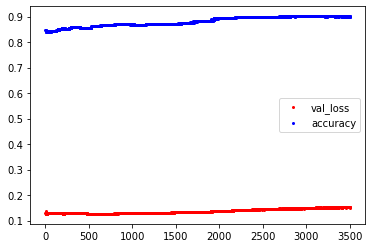

In [53]:
y_vloss = history.history['val_loss'] # 테스트 세트 손실
y_acc = history.history['accuracy'] # 학습 세트의 정확도
    

x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vloss, 'o', c='red', markersize=2, label="val_loss")
plt.plot(x_len, y_acc, 'o', c='blue',  markersize=2,label = 'accuracy')
plt.legend()
plt.show()

# 오차가 점점 증가하는....

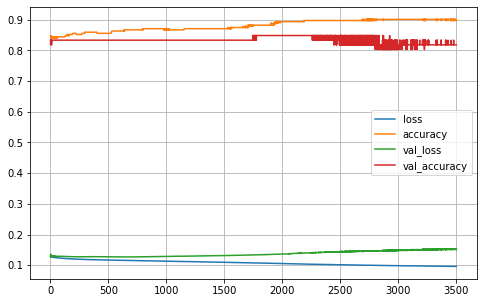

In [54]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)

## Early Stopping

In [56]:
from keras.callbacks import EarlyStopping
# 과적합을 방지하기 위해서
# 테스트셋 오차가 줄지 않으면 학습을 멈추게 하는 함수

early_stopping = EarlyStopping(monitor='val_loss', patience=100)
# 테스트 세트의 오차를 모니터
# 100번까지 오차가 나아지지 않아도 기다림

In [59]:
history = model.fit(X,y, validation_split=.2, epochs=3500, batch_size=500, verbose=0,
         callbacks=[early_stopping, checkpointer])


Epoch 00001: val_loss did not improve from 0.10277

Epoch 00002: val_loss did not improve from 0.10277

Epoch 00003: val_loss did not improve from 0.10277

Epoch 00004: val_loss did not improve from 0.10277

Epoch 00005: val_loss did not improve from 0.10277

Epoch 00006: val_loss did not improve from 0.10277

Epoch 00007: val_loss did not improve from 0.10277

Epoch 00008: val_loss did not improve from 0.10277

Epoch 00009: val_loss did not improve from 0.10277

Epoch 00010: val_loss did not improve from 0.10277

Epoch 00011: val_loss did not improve from 0.10277

Epoch 00012: val_loss did not improve from 0.10277

Epoch 00013: val_loss did not improve from 0.10277

Epoch 00014: val_loss did not improve from 0.10277

Epoch 00015: val_loss did not improve from 0.10277

Epoch 00016: val_loss did not improve from 0.10277

Epoch 00017: val_loss did not improve from 0.10277

Epoch 00018: val_loss did not improve from 0.10277

Epoch 00019: val_loss did not improve from 0.10277

Epoch 00020

3번째부터 같은 값.. 100번 더 수행 후 끝냄

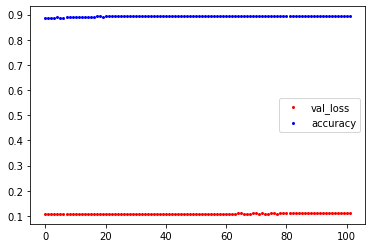

In [60]:
y_vloss = history.history['val_loss'] # 테스트 세트 손실
y_acc = history.history['accuracy'] # 학습 세트의 정확도
    
x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vloss, 'o', c='red', markersize=2, label="val_loss")
plt.plot(x_len, y_acc, 'o', c='blue',  markersize=2,label = 'accuracy')
plt.legend()
plt.show()

### 다중분류

In [65]:
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_iris
from keras.utils import np_utils
iris = load_iris()

In [67]:
X = iris.data
y = iris.target

#e = LabelEncoder()
#e.fit_transform(y)

In [80]:
X = X.astype(float)
y_encoded = np_utils.to_categorical(y)

y_encoded[:5]
# 원핫인코딩으로 처리

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [78]:
print(X.shape)
print(y_encoded.shape)

(150, 4)
(150, 3)


In [82]:
mod = Sequential(
    [
        Dense(16, input_dim=X.shape[1], activation='relu'),
        Dense(3, activation='softmax') # 출력 노드 3개!
    ])

mod.compile(loss='categorical_crossentropy', optimizer='adam',
           metrics=['accuracy'])

mod.summary()

# softmax 총합을 1로. 큰 값은 더 크게, 작은 값은 더 작게
# 교차 엔트로피로 다시 변경하면 원 핫 레이블이 된다 ( 1.0.0 )

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 16)                80        
_________________________________________________________________
dense_13 (Dense)             (None, 3)                 51        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [83]:
hist_iris = mod.fit(X,y_encoded, epochs=50, batch_size=1, verbose=0)

In [84]:
print("Accuracy", mod.evaluate(X, y_encoded)[1])

5/5 [==============================] - 0s 2ms/step - loss: 0.0852 - accuracy: 0.9867
Accuracy 0.9866666793823242


In [115]:
X = datas[:,0:17]
y = datas[:,17]
# 17개의 특성까지

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3,
                                                   random_state=seed)

In [122]:
from sklearn.model_selection import StratifiedKFold

early_stopping = EarlyStopping(monitor='loss', patience=100)

mod = Sequential(
    [
        Dense(16, input_dim=X.shape[1], activation='relu'),
        Dense(1, activation='sigmoid')
    ])

mod.compile( loss='mean_squared_error', optimizer='adam',
            metrics=['accuracy'])
# 클래스 비율을 유지하며 교차 검증 5회
# 데이터 섞기
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

accuracy=[]

for train,test in skf.split(X,y):
    print(X[train].shape)
    print(y[train].shape)
    mod.fit(X[train], y[train], epochs=50, batch_size=1, callbacks=[early_stopping])
    accuracy.append(mod.evaluate(X[test], y[test])[1])
    


(376, 17)
(376,)
Epoch 1/50
376/376 [==============================] - 0s 785us/step - loss: 0.1489 - accuracy: 0.8511
Epoch 2/50
376/376 [==============================] - 0s 694us/step - loss: 0.1489 - accuracy: 0.8511
Epoch 3/50
376/376 [==============================] - 0s 952us/step - loss: 0.1492 - accuracy: 0.8484
Epoch 4/50
376/376 [==============================] - 0s 814us/step - loss: 0.1499 - accuracy: 0.8484
Epoch 5/50
376/376 [==============================] - 0s 1ms/step - loss: 0.1473 - accuracy: 0.8511
Epoch 6/50
376/376 [==============================] - 0s 1ms/step - loss: 0.1497 - accuracy: 0.8484
Epoch 7/50
376/376 [==============================] - 0s 766us/step - loss: 0.1467 - accuracy: 0.8511
Epoch 8/50
376/376 [==============================] - 0s 761us/step - loss: 0.1484 - accuracy: 0.8511
Epoch 9/50
376/376 [==============================] - 0s 830us/step - loss: 0.1486 - accuracy: 0.8457
Epoch 10/50
376/376 [==============================] - 0s 726us/step 

376/376 [==============================] - 0s 1ms/step - loss: 0.1268 - accuracy: 0.8537
Epoch 31/50
376/376 [==============================] - 0s 1ms/step - loss: 0.1269 - accuracy: 0.8511
Epoch 32/50
376/376 [==============================] - 0s 1ms/step - loss: 0.1249 - accuracy: 0.8617
Epoch 33/50
376/376 [==============================] - 0s 707us/step - loss: 0.1260 - accuracy: 0.8644
Epoch 34/50
376/376 [==============================] - 0s 745us/step - loss: 0.1283 - accuracy: 0.8511
Epoch 35/50
376/376 [==============================] - 0s 1ms/step - loss: 0.1276 - accuracy: 0.8590: 0s - loss: 0.1133 - accuracy: 
Epoch 36/50
376/376 [==============================] - 0s 1ms/step - loss: 0.1243 - accuracy: 0.8537
Epoch 37/50
376/376 [==============================] - 0s 947us/step - loss: 0.1237 - accuracy: 0.8537
Epoch 38/50
376/376 [==============================] - 0s 713us/step - loss: 0.1267 - accuracy: 0.8457
Epoch 39/50
376/376 [==============================] - 0s 1ms/s

376/376 [==============================] - 0s 723us/step - loss: 0.1171 - accuracy: 0.8590
Epoch 8/50
376/376 [==============================] - 0s 705us/step - loss: 0.1140 - accuracy: 0.8644
Epoch 9/50
376/376 [==============================] - 0s 726us/step - loss: 0.1154 - accuracy: 0.8644
Epoch 10/50
376/376 [==============================] - 0s 660us/step - loss: 0.1162 - accuracy: 0.8617
Epoch 11/50
376/376 [==============================] - 0s 718us/step - loss: 0.1127 - accuracy: 0.8644
Epoch 12/50
376/376 [==============================] - 0s 668us/step - loss: 0.1114 - accuracy: 0.8723
Epoch 13/50
376/376 [==============================] - 0s 678us/step - loss: 0.1128 - accuracy: 0.8590
Epoch 14/50
376/376 [==============================] - 0s 673us/step - loss: 0.1174 - accuracy: 0.8617
Epoch 15/50
376/376 [==============================] - 0s 806us/step - loss: 0.1133 - accuracy: 0.8644
Epoch 16/50
376/376 [==============================] - 0s 731us/step - loss: 0.1177 - a

Epoch 36/50
376/376 [==============================] - 0s 1ms/step - loss: 0.1093 - accuracy: 0.8670
Epoch 37/50
376/376 [==============================] - 0s 707us/step - loss: 0.1078 - accuracy: 0.8750
Epoch 38/50
376/376 [==============================] - 0s 1ms/step - loss: 0.1075 - accuracy: 0.8750
Epoch 39/50
376/376 [==============================] - 0s 686us/step - loss: 0.1129 - accuracy: 0.8617
Epoch 40/50
376/376 [==============================] - 0s 694us/step - loss: 0.1055 - accuracy: 0.8777
Epoch 41/50
376/376 [==============================] - 0s 718us/step - loss: 0.1072 - accuracy: 0.8697
Epoch 42/50
376/376 [==============================] - 0s 933us/step - loss: 0.1081 - accuracy: 0.8777
Epoch 43/50
376/376 [==============================] - 0s 707us/step - loss: 0.1092 - accuracy: 0.8750
Epoch 44/50
376/376 [==============================] - 0s 702us/step - loss: 0.1069 - accuracy: 0.8777
Epoch 45/50
376/376 [==============================] - 0s 816us/step - loss: 

In [123]:
print(accuracy)

[0.8510638475418091, 0.8510638475418091, 0.8510638475418091, 0.8617021441459656, 0.8510638475418091]


In [104]:
from sklearn.datasets import fetch_lfw_people

people = fetch_lfw_people(min_faces_per_person=20, resize=.7, color=True)
image_shape = people.images[0].shape
print(image_shape)

print(people.keys())
print(people.images.shape)
print(people.data.shape)
print(len(people.target_names))

(87, 65, 3)
dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])
(3023, 87, 65, 3)
(3023, 16965)
62


In [ ]:
mask = np.zeros(people.target.shape, dtype=np.bool)

for t in np.unique(people.target):
    mask[np.where(people.target==t)[0][:20]] =1
#np.where로 찾으면 arr [0] 에 그 결과가 들어옴
#거기서 50개까지를 선택
    
x_people = people.images[mask]
y_people = people.target[mask]

x_people = x_people/ 255.
#0~255 픽셀값을 0~1로 조정함.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_people,
                                                    y_people, 
                                                    random_state=0)

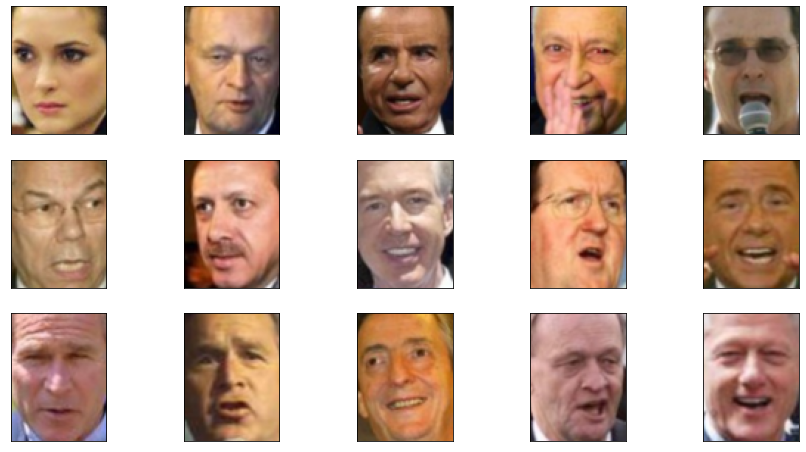

In [111]:
fig, axes = plt.subplots(3, 5 ,figsize=(15,8), subplot_kw={'xticks':(), 'yticks':()})

for t, i, ax in zip(y_people, x_people, axes.ravel()):
    ax.imshow(i)

In [102]:
from keras.layers import Conv2D, Dropout, Flatten, MaxPooling2D

In [100]:
X_train.shape[1:]

(87, 65)

In [ ]:
model = Sequential([
    Conv2D(16, kernel_size=(3,3), input_shape = X_train.shape[1:],
              activation='relu'),
    Conv2D(32, kernel_size=(3,3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20, batch_size=10, verbose=2)


In [110]:
print("Accuracy : ", model.evaluate(X_test, y_test)[1])

17/17 [==============================] - 0s 28ms/step - loss: 1193.1434 - accuracy: 0.0155
Accuracy :  0.01550387591123581
